### In this project, I will analyse stock data and anaylse the portfolio with some common statistics###

### Import libraries

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
#import pandas.io.data as web
import pandas_datareader.data as web
import seaborn as sns

%matplotlib inline

### Function to get the data from yahoo finance

In [56]:
def get_data(symbols, start, end,dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
            
    df = pd.DataFrame(index=dates)

    for symbol in symbols:
        df_temp = web.DataReader(symbol,'yahoo',start,end)
        df_temp = df_temp[['Adj Close']]
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df

### Function to compute the rolling mean

In [57]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #return pd.rolling_mean(values, window=window)
    return values.rolling(window=window,center=False).mean()

### Function to compute the rolling standard deviation

In [58]:
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # Compute and return rolling standard deviation
    #return pd.rolling_std(values,window)
    return values.rolling(window=window,center=False).std()


### Function to compute the bollinger bands

In [59]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    #Compute upper_band and lower_band
    upper_band = rm + (rstd * 2)
    lower_band = rm - (rstd * 2)
    return upper_band, lower_band


### Function to compute daily returns

In [171]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    #df_dr = df.copy()
    #df_dr[1:] = (df_dr[1:] / df_dr[:-1].values) - 1  #Alternate option
    df_dr = (df / df.shift(1)) -1
    df_dr.ix[0,:] = 0    # To replace NaNs with 0
    return df_dr

### Function to compute cumulative returns

In [170]:
def compute_cumulative_returns(df):
    """Compute and return the cumulative return values."""
    #df_dr = df.copy()
    #df_dr[1:] = (df_dr[1:] / df_dr[:-1].values) - 1  #Alternate option
    df_cr = (df / df.ix[0]) -1
    df_cr.ix[0,:] = 0    # To replace NaNs with 0
    return df_cr

### Function call to plot_data

In [62]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    plot_data(df.ix[start_index:end_index,columns])


### Function to plot 'Adj Close' for symbols provided

In [63]:
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12,figsize=(10,8))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

### Calling functions

In [64]:
# Define a date range
dates = pd.date_range('2016-01-01', '2016-12-31')
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2016,12,31)
# Choose stock symbols to read
symbols = ['SPY','GOOG', 'IBM', 'GLD'] 

                   SPY        GOOG         IBM         GLD
2016-01-04  196.794026  741.840027  130.959683  102.889999
2016-01-05  197.126874  742.580017  130.863362  103.180000
2016-01-06  194.640278  743.619995  130.208315  104.669998
2016-01-07  189.970552  726.390015  127.983111  106.150002
2016-01-08  187.885326  714.469971  126.798264  105.680000
2016-01-11  188.071334  716.030029  128.339524  104.739998
2016-01-12  189.588752  726.070007  128.021636  104.209999
2016-01-13  184.860290  700.559998  126.355143  104.720001
2016-01-14  187.895110  714.719971  128.031278  103.019997
2016-01-15  183.861729  694.450012  125.256990  104.080002


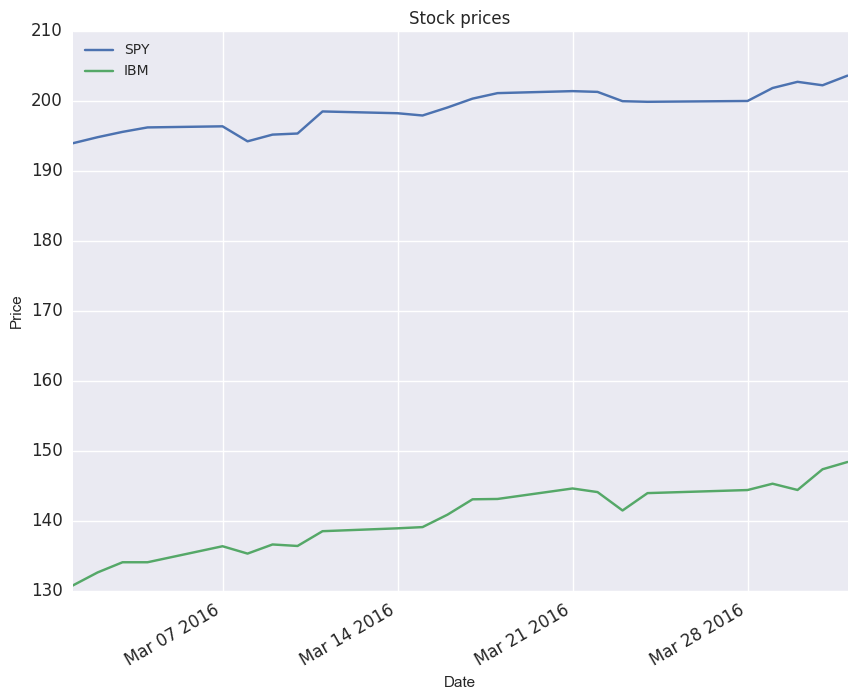

In [65]:
# Get stock data. Data will have 'Adj Close' values
df = get_data(symbols, start,end,dates)
print(df.head(10))
# Slice and plot
plot_selected(df, ['SPY', 'IBM'], '2016-03-01', '2016-04-01')

In [66]:
#Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    

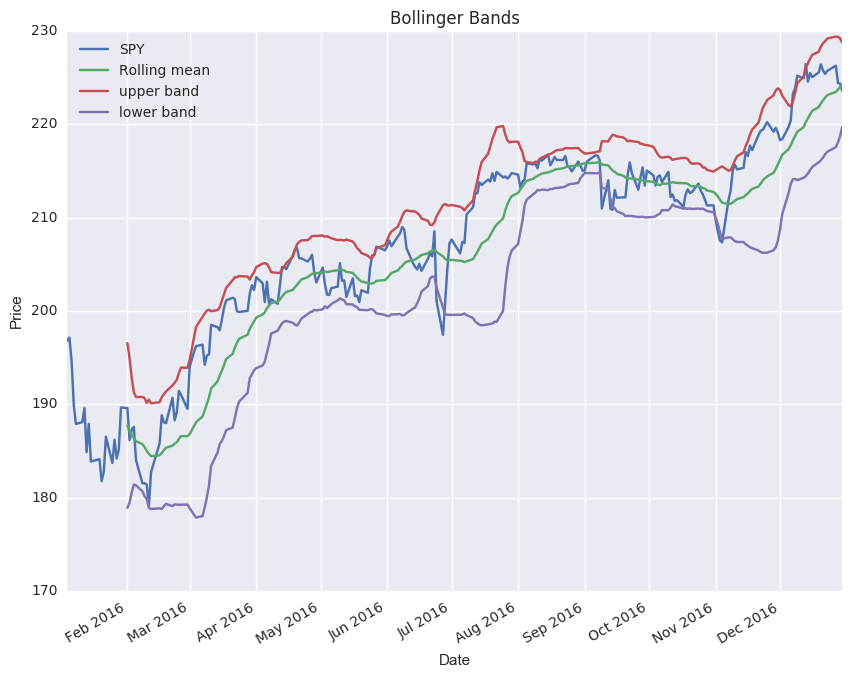

In [67]:
# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY',figsize=(10,8))
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.figure(figsize=(10,8))
plt.show()

In [235]:
# Compute daily returns
dates = pd.date_range('2016-07-01', '2016-07-31')
symbols = ['SPY','GOOG', 'IBM', 'GLD']
df = get_data(symbols, start,end,dates)
daily_returns = compute_daily_returns(df)
print(daily_returns.head())

                 SPY      GOOG       IBM       GLD
2016-07-01  0.000000  0.000000  0.000000  0.000000
2016-07-05 -0.007193 -0.006093 -0.004398  0.008255
2016-07-06  0.005998  0.004058  0.004549  0.005870
2016-07-07 -0.000620 -0.003454  0.001510 -0.003763
2016-07-08  0.014890  0.014769  0.012189  0.006012


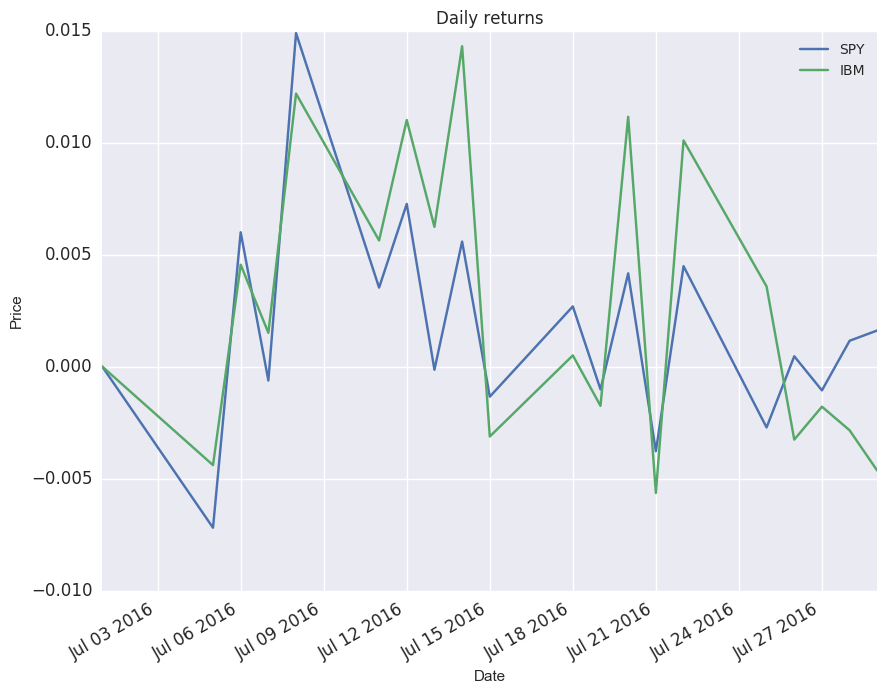

In [236]:
# Plotting daily returns for 'SPY' and 'IBM' for the month of July'2016
plot_data(daily_returns[['SPY','IBM']], title="Daily returns")

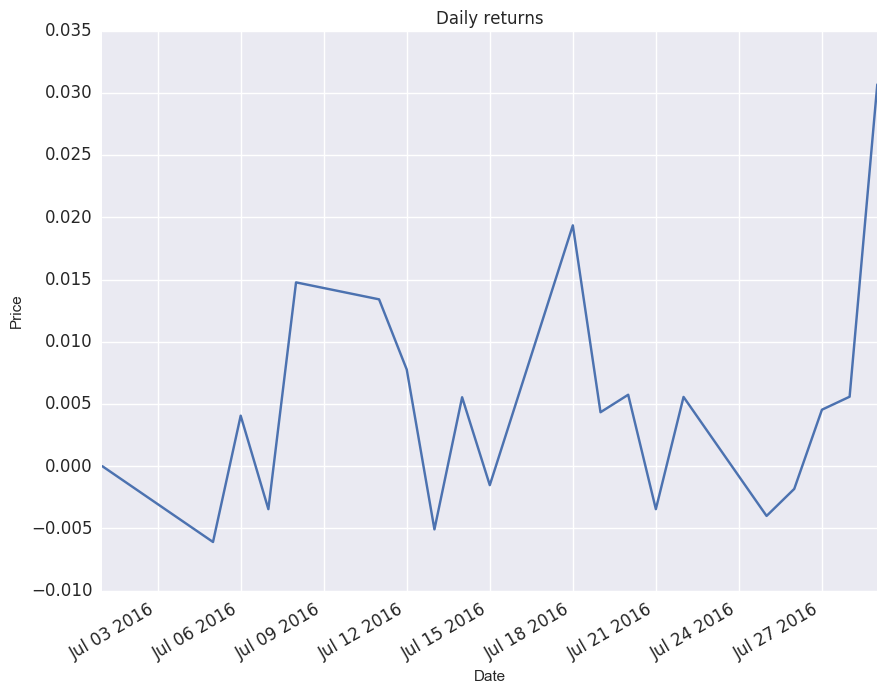

In [71]:
# Plotting daily returns for 'GOOG' for the month of July'2016
plot_data(daily_returns['GOOG'], title="Daily returns")

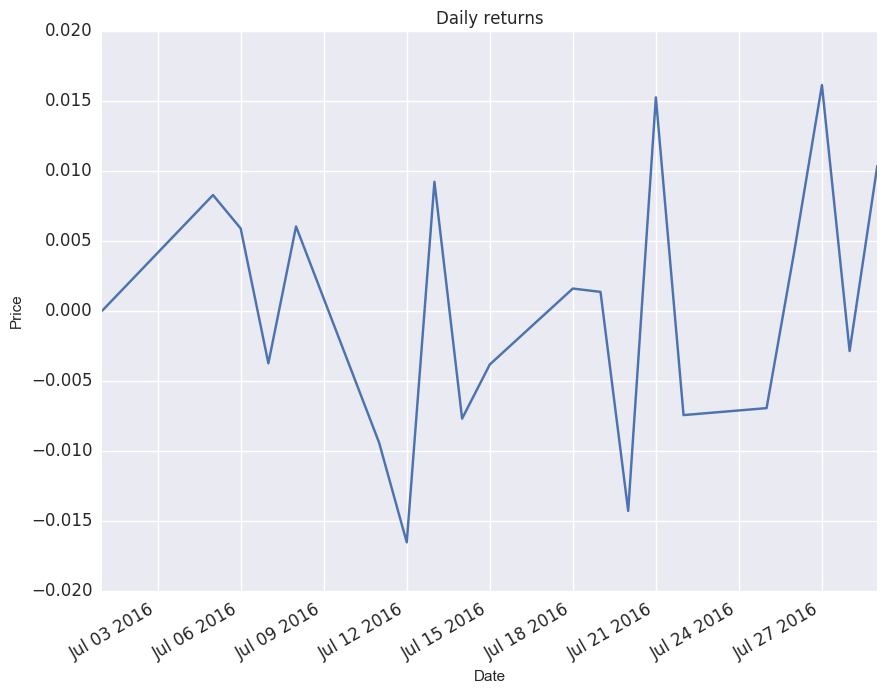

In [72]:
# Plotting daily returns for 'GLD' for the month of July'2016
plot_data(daily_returns['GLD'], title="Daily returns")

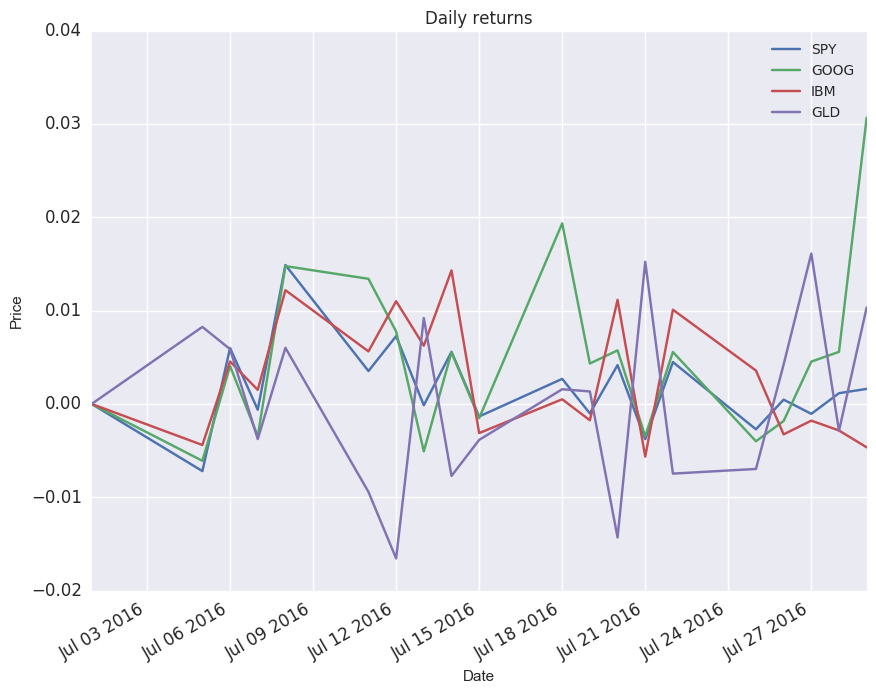

In [73]:
# Plotting daily returns for all for the month of July'2016
plot_data(daily_returns, title="Daily returns")

In [80]:
# Compute cumulative returns
dates = pd.date_range('2016-01-01', '2016-12-31')
symbols = ['SPY','GOOG', 'IBM', 'GLD']
df = get_data(symbols, start,end,dates)
cumulative_returns = compute_cumulative_returns(df)
print(cumulative_returns.head())

                 SPY      GOOG       IBM       GLD
2016-01-04  0.000000  0.000000  0.000000  0.000000
2016-01-05  0.001691  0.000998 -0.000736  0.002819
2016-01-06 -0.010944  0.002399 -0.005737  0.017300
2016-01-07 -0.034673 -0.020827 -0.022729  0.031684
2016-01-08 -0.045269 -0.036895 -0.031776  0.027116


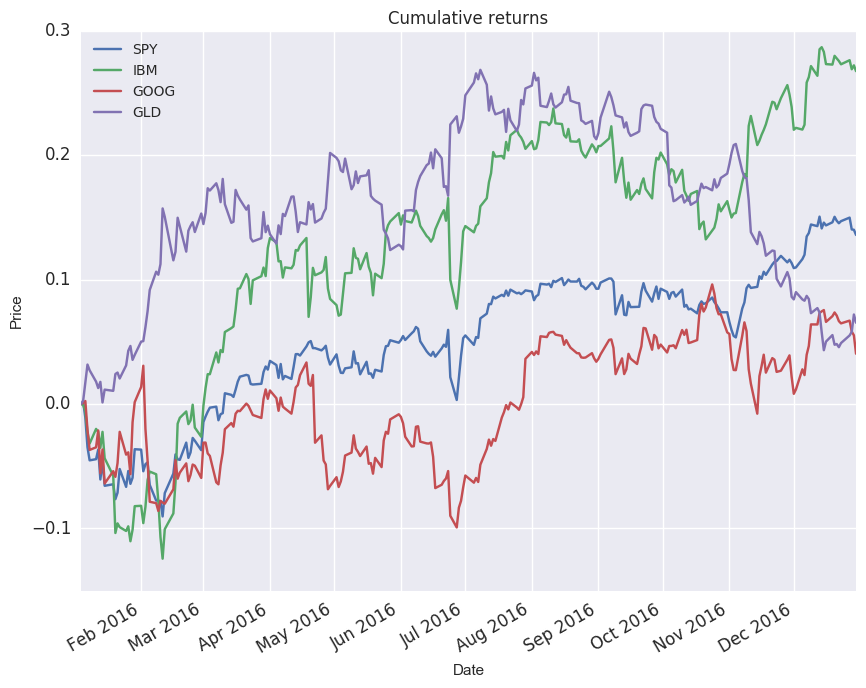

In [92]:
# Plotting cumulative returns for 'SPY' and 'IBM'
plot_data(cumulative_returns[['SPY','IBM','GOOG','GLD']], title="Cumulative returns")

### Cumulative returns values

In [ ]:
# Cumulative_return = ((price[t] /  price[0]) -1 ) * 100    # result in %

In [95]:
df_cr = ((df.ix[-1] / df.ix[0]) -1 ) * 100

In [96]:
df_cr

SPY     13.585765
GOOG     4.041300
IBM     26.748936
GLD      6.531249
dtype: float64

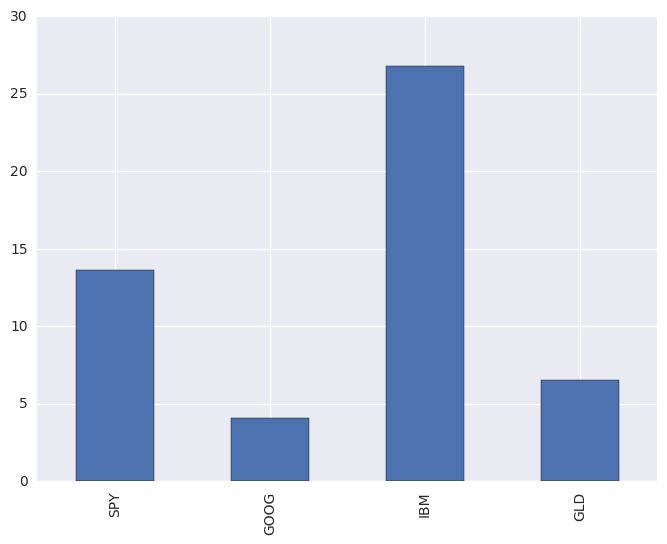

In [97]:
plt.figure(figsize=(8,6))
df_cr.plot(kind='bar')

In [131]:
df.head()

,SPY,GOOG,IBM,GLD
2016-01-04,196.794026,741.840027,130.959683,102.889999
2016-01-05,197.126874,742.580017,130.863362,103.180000
2016-01-06,194.640278,743.619995,130.208315,104.669998
2016-01-07,189.970552,726.390015,127.983111,106.150002
2016-01-08,187.885326,714.469971,126.798264,105.680000


In [133]:
df.index.name = 'Date'

In [134]:
df.head()

,SPY,GOOG,IBM,GLD
Date,,,,
2016-01-04,196.794026,741.840027,130.959683,102.889999
2016-01-05,197.126874,742.580017,130.863362,103.180000
2016-01-06,194.640278,743.619995,130.208315,104.669998
2016-01-07,189.970552,726.390015,127.983111,106.150002
2016-01-08,187.885326,714.469971,126.798264,105.680000


In [136]:
df.reset_index(inplace=True)

In [137]:
df.head()

,Date,SPY,GOOG,IBM,GLD
0,2016-01-04,196.794026,741.840027,130.959683,102.889999
1,2016-01-05,197.126874,742.580017,130.863362,103.180000
2,2016-01-06,194.640278,743.619995,130.208315,104.669998
3,2016-01-07,189.970552,726.390015,127.983111,106.150002
4,2016-01-08,187.885326,714.469971,126.798264,105.680000


In [145]:
pd.date_range('2016-01-01', '2016-01-31').month

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [150]:
df.head()

,Date,SPY,GOOG,IBM,GLD,month
0,2016-01-04,196.794026,741.840027,130.959683,102.889999,1
1,2016-01-05,197.126874,742.580017,130.863362,103.180000,1
2,2016-01-06,194.640278,743.619995,130.208315,104.669998,1
3,2016-01-07,189.970552,726.390015,127.983111,106.150002,1
4,2016-01-08,187.885326,714.469971,126.798264,105.680000,1


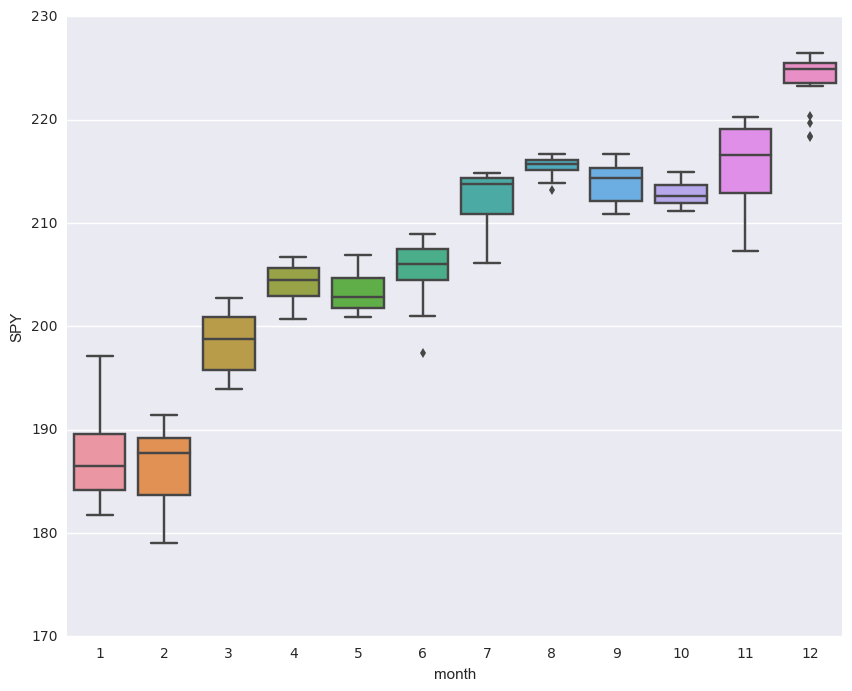

In [159]:
plt.figure(figsize=(10,8))
sns.boxplot(x='month',y='SPY',data=df)

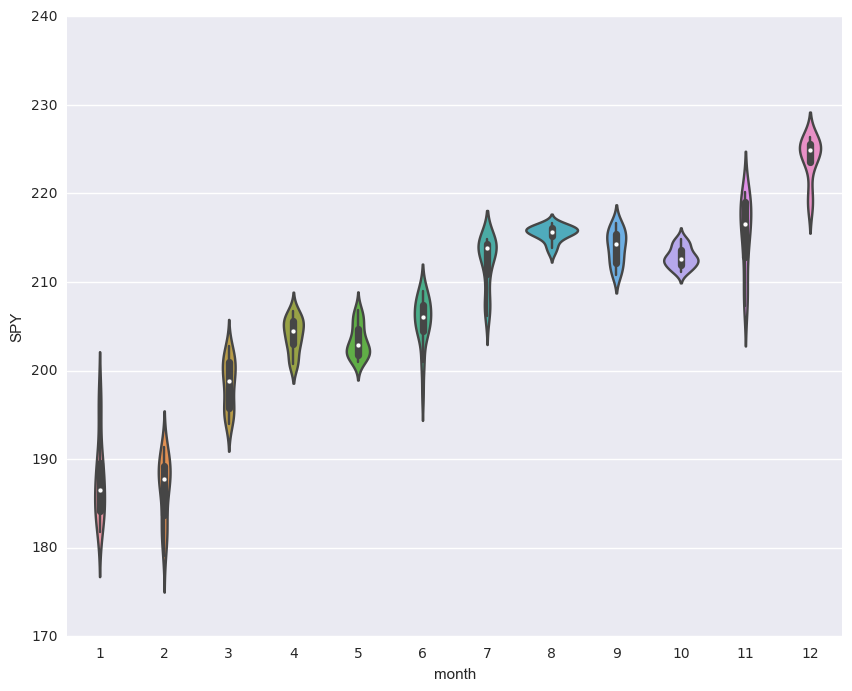

In [160]:
plt.figure(figsize=(10,8))
sns.violinplot(x='month',y='SPY',data=df)

### Compute daily returns of SPY for last 3 years

In [210]:
dates = pd.date_range('2013-01-01', '2016-12-31')
symbols = ['SPY','IBM','GOOG','GLD']
df = get_data(symbols, start,end,dates)
daily_returns = compute_daily_returns(df)
print(daily_returns.head())

                 SPY       IBM      GOOG       GLD
2016-01-04  0.000000  0.000000  0.000000  0.000000
2016-01-05  0.001691 -0.000736  0.000998  0.002819
2016-01-06 -0.012614 -0.005006  0.001400  0.014441
2016-01-07 -0.023992 -0.017090 -0.023170  0.014140
2016-01-08 -0.010977 -0.009258 -0.016410 -0.004428


### Histogram of 'SPY' for daily returns in last 3 years 

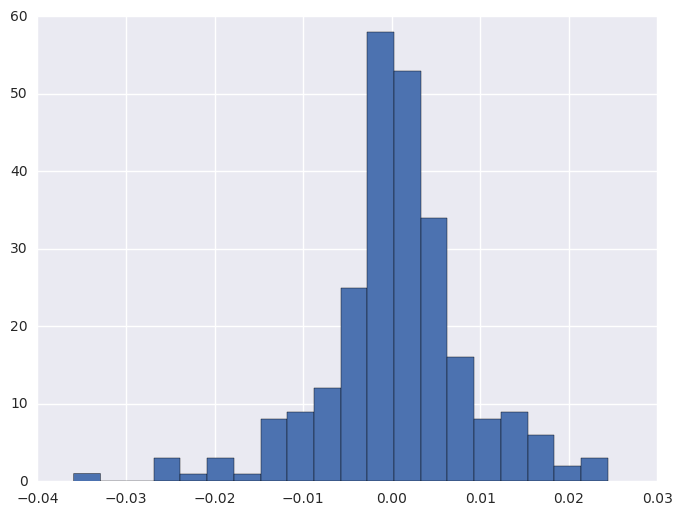

In [211]:
daily_returns['SPY'].hist(bins=20,figsize=(8,6))

### Computing mean and std for daily returns of SPY

In [212]:
mean_spy = daily_returns['SPY'].mean()
print('Mean= ',mean_spy)
std_spy = daily_returns['SPY'].std()
print('STD= ',std_spy)

Mean=  0.0005389937446993652
STD=  0.008176911211823965


### Ploting mean and std calculated above

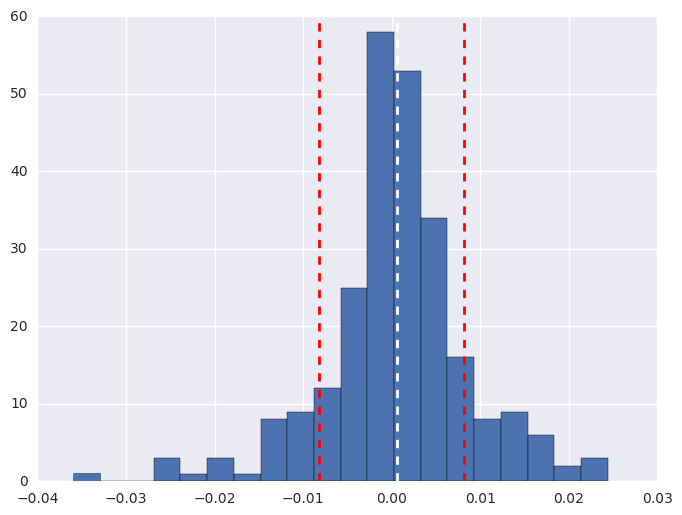

In [218]:
daily_returns['SPY'].hist(bins=20,figsize=(8,6))
plt.axvline(mean_spy,color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_spy,color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_spy,color='r',linestyle='dashed',linewidth=2)

*** White dashed line is the mean and red dashed lines are the standard deviation***

### Computing Kurtosis for daily returns of SPY

In [214]:
print(daily_returns.kurtosis())

SPY     2.436260
IBM     4.495593
GOOG    2.679265
GLD     2.934402
dtype: float64


*** Positive kurtosis value indicates fat tails

### Comparing histogram for 2 stocks

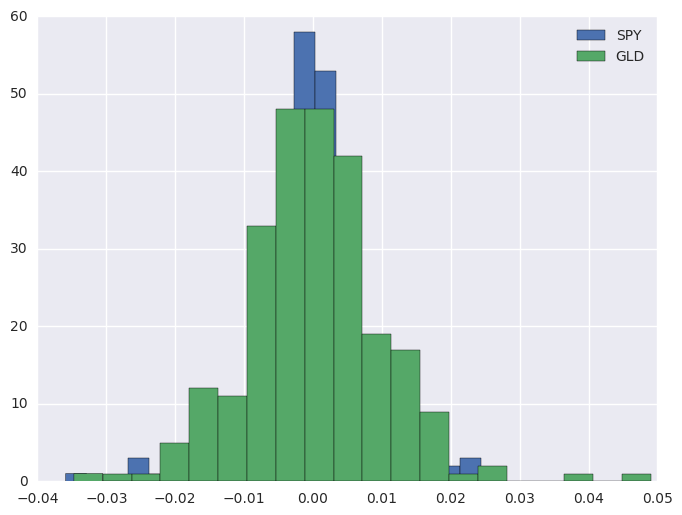

In [217]:
daily_returns['SPY'].hist(bins=20,figsize=(8,6),label='SPY')
daily_returns['GLD'].hist(bins=20,figsize=(8,6),label='GLD')
plt.legend(loc='upper right')

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


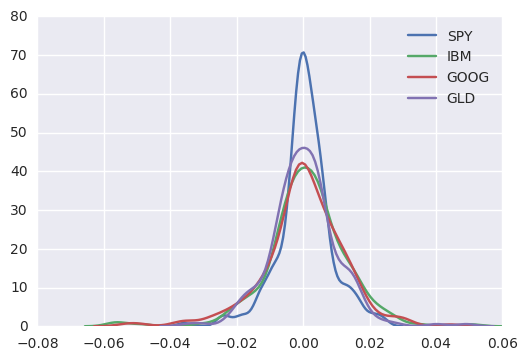

In [229]:
sns.kdeplot(daily_returns['SPY'])
sns.kdeplot(daily_returns['IBM'])
sns.kdeplot(daily_returns['GOOG'])
sns.kdeplot(daily_returns['GLD'])

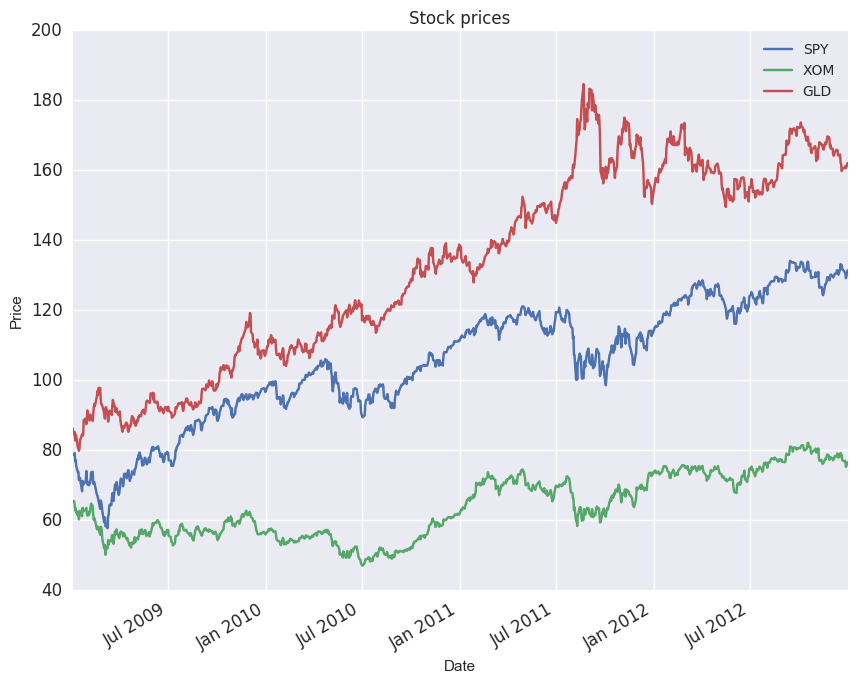

In [242]:
dates = pd.date_range('2009-01-01', '2012-12-31')
start = datetime.datetime(2009,1,1)
end = datetime.datetime(2012,12,31)
symbols = ['SPY','XOM','GLD']
df = get_data(symbols, start,end,dates)
plot_data(df)

### Lets draw a scatter plot for SPY and XOM

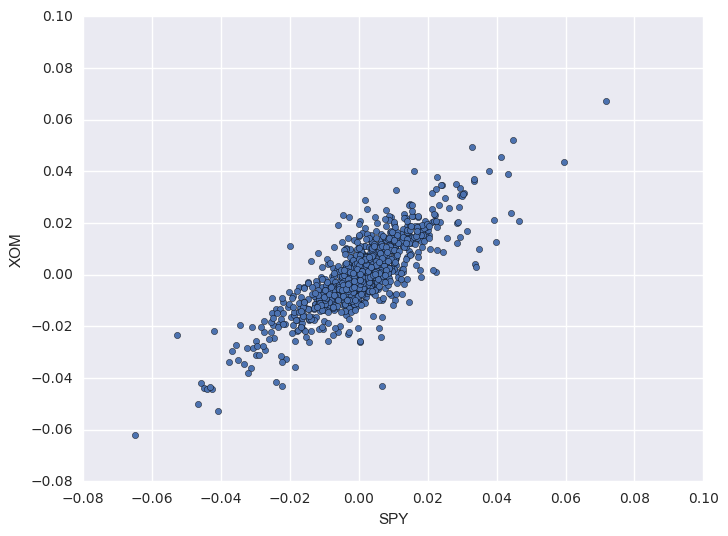

In [248]:
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter',x='SPY',y='XOM',figsize=(8,6))

### Lets draw a scatter plot for SPY and GLD

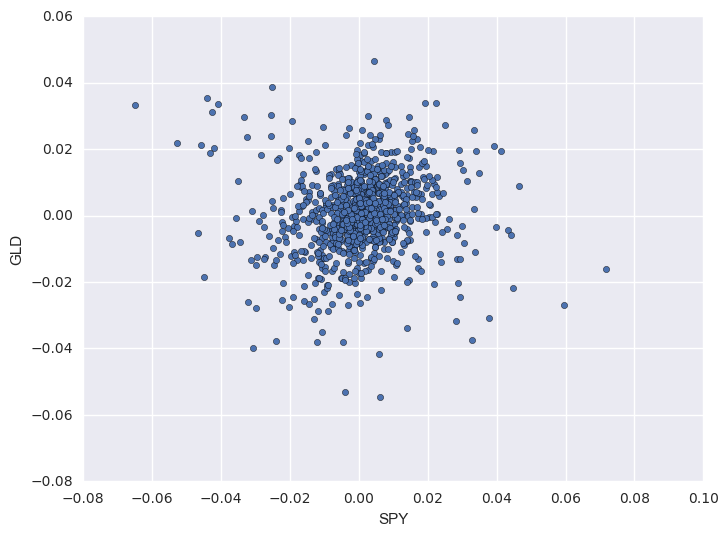

In [247]:
daily_returns.plot(kind='scatter',x='SPY',y='GLD',figsize=(8,6))

### Lets fit a straight line in the above scatter plots using polyfit function of numpy

beta XOM(or m)=  0.855601218751
alpha XOM(or b)=  -0.000260218657198


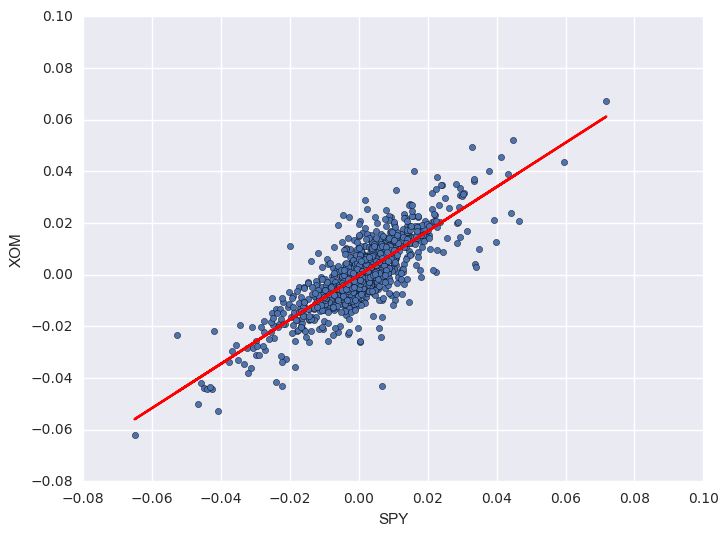

In [253]:
daily_returns.plot(kind='scatter',x='SPY',y='XOM',figsize=(8,6))
beta_XOM,alpha_XOM = np.polyfit(daily_returns['SPY'],daily_returns['XOM'],1) 
# the above polyfit function will return ploynomial coefficient and intercept ( y = mx + b) where x = daily_returns['SPY'] and
# y = daily_returns['XOM'] and '1' represent the degree of the polynomial. Also m = beta_XOM and b = alpha_XOM
print('beta XOM(or m)= ',beta_XOM )
print('alpha XOM(or b)= ',alpha_XOM)
#Lets plot for every value of x, the value of y which is given as 'mx + b'
plt.plot(daily_returns['SPY'], beta_XOM * daily_returns['SPY'] + alpha_XOM, '-',color='r' )

beta GLD(or m)=  0.0679065860134
alpha GLD(or b)=  0.000654086716204


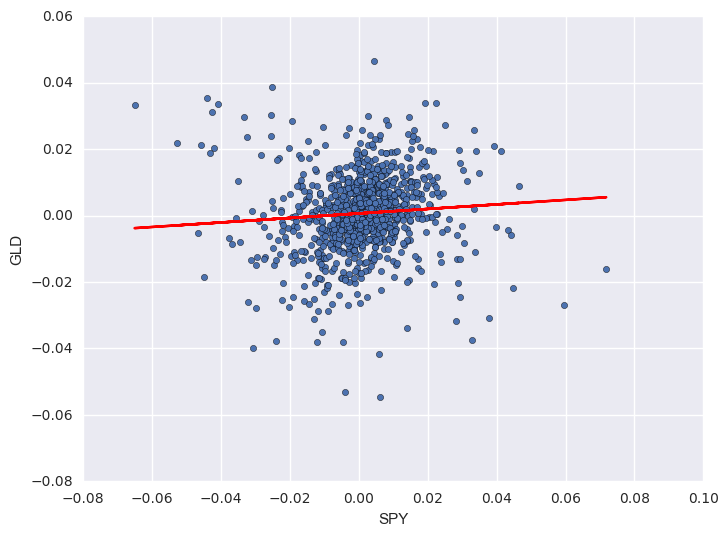

In [254]:
daily_returns.plot(kind='scatter',x='SPY',y='GLD',figsize=(8,6))
beta_GLD,alpha_GLD = np.polyfit(daily_returns['SPY'],daily_returns['GLD'],1) 
# the above polyfit function will return ploynomial coefficient and intercept ( y = mx + b) where x = daily_returns['SPY'] and
# y = daily_returns['XOM'] and '1' represent the degree of the polynomial. Also m = beta_XOM and b = alpha_XOM
print('beta GLD(or m)= ',beta_GLD )
print('alpha GLD(or b)= ',alpha_GLD)
#Lets plot for every value of x, the value of y which is given as 'mx + b'
plt.plot(daily_returns['SPY'], beta_GLD * daily_returns['SPY'] + alpha_GLD, '-',color='r' )

*** We can see that beta value for XOM is greater than GLD which mean XOM was more reactive to market than GDL. Also alpha values of GLD and XOM shows how well they performed compared to SPY. ( positive value means it performed better than SPY and vice-versa) which can be confirmed from the plot below.***

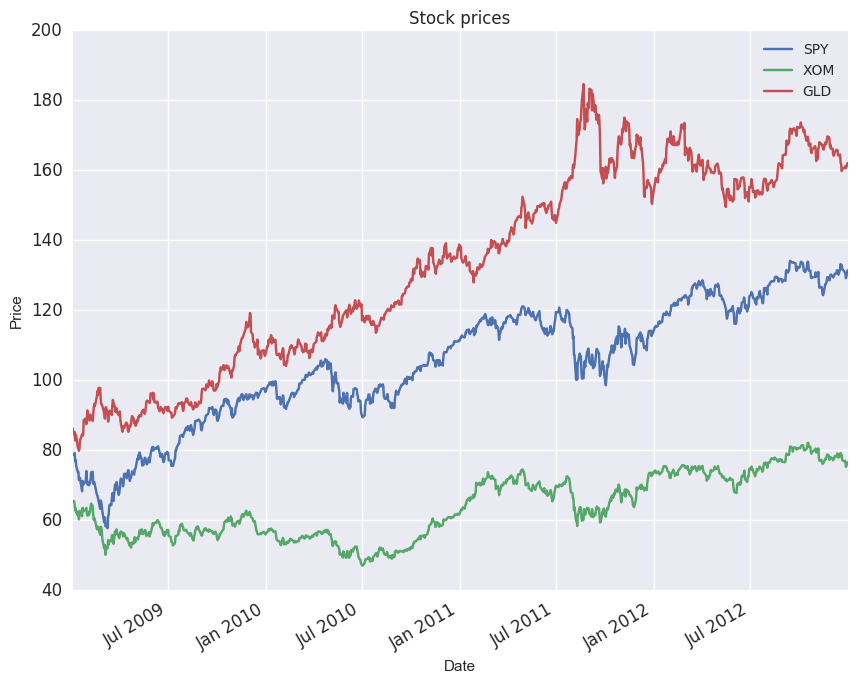

In [255]:
plot_data(df)

### Lets check the correlation among the daily returns of stocks 

In [256]:
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.821369,0.076348
XOM,0.821369,1.000000,0.080527
GLD,0.076348,0.080527,1.000000


In [259]:
# We can see from the above table that  SPY and XOM are highly correlated which can be confirmed from the plots below.
# The same is not true for SPY and GLD

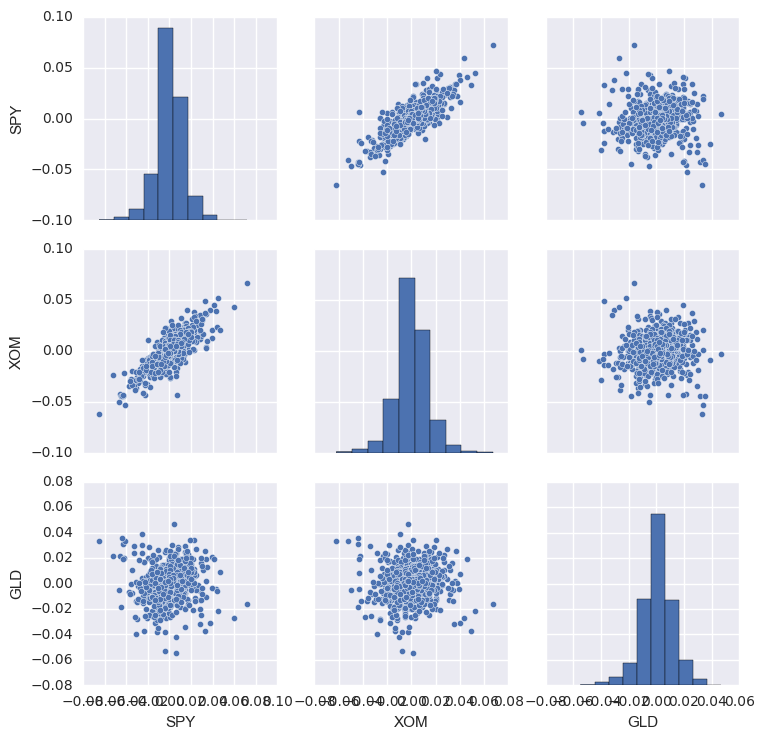

In [257]:
sns.pairplot(daily_returns)

### Performance of a portfolio

In [260]:
# Lets analyse the performance of the following sample portfolio:
# initial investment = $1000000
# start date = 2009-01-01
# end date   = 2011-12-31
# stocks     = ['SPY','XOM','GOOG','GLD']
# percentage allocation = [40%, 40%, 10%, 10%]

** Lets get the prices for the stocks **

                  SPY        XOM        GOOG        GLD
2009-01-02  78.738477  65.428822  160.499779  86.230003
2009-01-05  78.645305  65.420805  163.861421  84.480003
2009-01-06  79.170456  64.354907  166.863420  85.129997
2009-01-07  76.798813  62.711971  160.844427  82.750000
2009-01-08  77.112211  63.385170  162.432840  84.459999


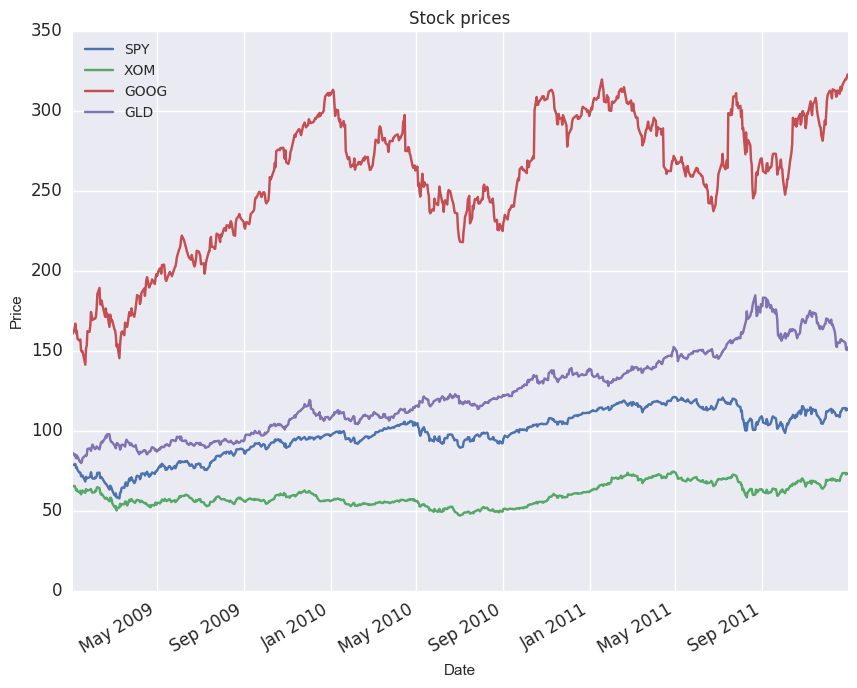

In [262]:
# Define a date range
dates = pd.date_range('2009-01-01', '2011-12-31')
start = datetime.datetime(2009,1,1)
end = datetime.datetime(2011,12,31)
# Choose stock symbols to read
symbols = ['SPY','XOM','GOOG','GLD'] 

# Get stock data. Data will have 'Adj Close' values
df_portfolio = get_data(symbols, start,end,dates)
print(df_portfolio.head())
# Slice and plot
plot_selected(df_portfolio, ['SPY','XOM','GOOG', 'GLD'], '2009-01-01', '2011-12-31')

** Normalize the data **

In [264]:
df_normalized = df_portfolio / df_portfolio.iloc[0]
df_normalized.head()

,SPY,XOM,GOOG,GLD
2009-01-02,1.000000,1.000000,1.000000,1.000000
2009-01-05,0.998817,0.999877,1.020945,0.979705
2009-01-06,1.005486,0.983587,1.039649,0.987243
2009-01-07,0.975366,0.958476,1.002147,0.959643
2009-01-08,0.979346,0.968765,1.012044,0.979473


** Applying the allocation percentage **

In [267]:
allocation = [0.4,0.4,0.1,0.1]
df_allocated = df_normalized * allocation

In [268]:
df_allocated.head()

,SPY,XOM,GOOG,GLD
2009-01-02,0.400000,0.400000,0.100000,0.100000
2009-01-05,0.399527,0.399951,0.102094,0.097971
2009-01-06,0.402195,0.393435,0.103965,0.098724
2009-01-07,0.390146,0.383390,0.100215,0.095964
2009-01-08,0.391738,0.387506,0.101204,0.097947


** Applying the initial amount to the allocation **

In [270]:
initial_investment = 1000000
df_position = df_allocated * initial_investment
df_position.head()

,SPY,XOM,GOOG,GLD
2009-01-02,400000.000000,400000.000000,100000.000000,100000.000000
2009-01-05,399526.676138,399950.987961,102094.483881,97970.543965
2009-01-06,402194.500155,393434.605929,103964.890818,98724.334963
2009-01-07,390146.296581,383390.494177,100214.734252,95964.278234
2009-01-08,391738.392400,387506.105490,101204.401035,97947.345543


** Adding up the portfolio value for each day of investment period **

In [279]:
df_portfolio_value = pd.DataFrame(df_position.sum(axis=1))
df_portfolio_value.columns = ['Portfolio_Valuation']
df_portfolio_value.head()

,Portfolio_Valuation
2009-01-02,1000000.000000
2009-01-05,999542.691945
2009-01-06,998318.331865
2009-01-07,969715.803244
2009-01-08,978396.244468


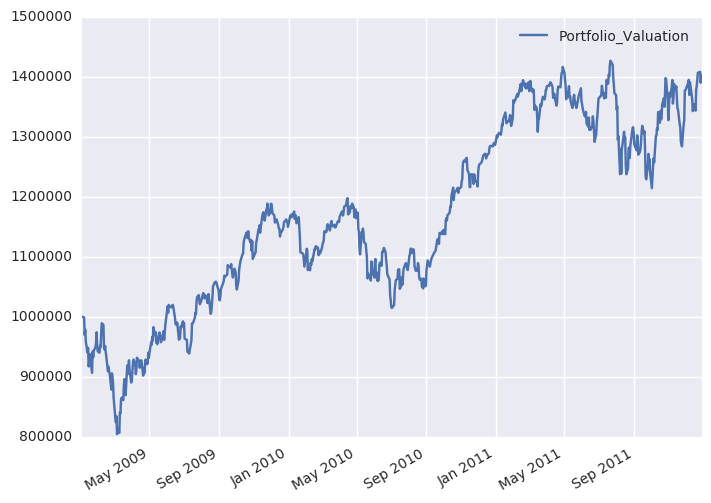

In [282]:
df_portfolio_value.plot(figsize=(8,6))

###  Portfolio Statistics

** Lets compute daily returns **

In [284]:
# Compute daily returns
#dates = pd.date_range('2016-07-01', '2016-07-31')
#symbols = ['SPY','GOOG', 'IBM', 'GLD']
#df = get_data(symbols, start,end,dates)
daily_portfolio_returns = compute_daily_returns(df_portfolio_value)
daily_portfolio_returns = daily_portfolio_returns[1:]
print(daily_portfolio_returns.head())

            Portfolio_Valuation
2009-01-05            -0.000457
2009-01-06            -0.001225
2009-01-07            -0.028651
2009-01-08             0.008952
2009-01-09            -0.020047


** Lets compute cumulative returns **

In [285]:
df_cpr = ((df_portfolio_value.ix[-1] / df_portfolio_value.ix[0]) -1 ) * 100
df_cpr

Portfolio_Valuation    39.91882
dtype: float64

** Lets compute average daily returns for the portfolio **

In [291]:
avg_daily_returns = daily_portfolio_returns.mean()
avg_daily_returns

Portfolio_Valuation    0.000519
dtype: float64

In [293]:
std_daily_returns = daily_portfolio_returns.std()
std_daily_returns

Portfolio_Valuation    0.012141
dtype: float64

*** More statistics to be added soon ***